# <font color='black'>Driver Behavior TPIIS</font>


In [1]:
'''
Bibliotecas e Módulos
'''
#Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import pickle

#Módulos
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Módulos (Algoritmos - ML)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### <font color='black'>1 - Carregar Dataset</font>
#### <u>Link do Dataset: https://data.mendeley.com/datasets/jj3tw8kj6h/2</u>

In [2]:
'''
Dataset
'''
datasetname = 'db_w20'
#Carregar Dataset
dat = pd.read_csv('./dataset-mod/'+datasetname+'.csv')
print("=== (linhas, colunas) ===")
print(dat.shape)
print("")

# Verificar as 5 primeiras linhas
print("=== 5 primeiras linhas do Dataset ===")
print(dat.head())

#Número de casos por classe
print("")
print("=== Número de casos por classe ===")
print("")
for i in range(1, 5):
    Class = len(dat.loc[dat['Class'] == i])
    print("Classe "+str(i)+": "+str(Class))

=== (linhas, colunas) ===
(1095, 31)

=== 5 primeiras linhas do Dataset ===
   Class     GyroX     GyroY     GyroZ      AccX      AccY      AccZ  \
0      1 -0.748092  4.374046  0.809160  0.155762 -0.082275 -0.987549   
1      1 -0.587786  5.366412  1.877863  0.356445 -0.186035 -1.053467   
2      1 -0.389313  2.526718  0.381679  0.516846 -0.183350 -0.808350   
3      1  1.320611  9.213740  1.832061  0.643555 -0.215820 -1.069580   
4      1 -3.709924  5.793893 -1.419847  0.304688 -0.197998 -1.033203   

   GyroMeanX  GyroMeanY  GyroMeanZ    ...     AccMeanZ   AccMinX   AccMinY  \
0  -0.117557   4.070611   0.332061    ...    -0.957727  0.155762 -0.297363   
1  -0.100763   4.154198   0.384733    ...    -0.961926  0.155762 -0.297363   
2  -0.074809   4.053817   0.362214    ...    -0.951685  0.155762 -0.297363   
3  -0.048092   4.316031   0.424427    ...    -0.959583  0.155762 -0.297363   
4  -0.250382   4.377481   0.366031    ...    -0.964404  0.155762 -0.297363   

    AccMinZ   AccMaxX 

### <font color='black'>2 - Analisando Dataset</font>

In [3]:
print("=== Correlação entre as variáveis ===")
# Identificar correlação entre as variáveis
def plot_corr(dat, size=7):
    corr = dat.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

# Visualizar correlação em uma tabela
dat.corr()

=== Correlação entre as variáveis ===


,Class,GyroX,GyroY,GyroZ,AccX,AccY,AccZ,GyroMeanX,GyroMeanY,GyroMeanZ,...,AccMeanZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccStdX,AccStdY,AccStdZ
Class,1.000000,-0.050009,0.070255,0.181387,-0.008944,0.209183,-0.032806,-0.165445,0.247899,0.337796,...,-0.150440,0.100689,0.221710,0.296776,0.116648,0.391751,-0.410788,0.196401,0.363355,-0.485440
GyroX,-0.050009,1.000000,-0.132647,-0.461620,-0.100093,-0.422268,-0.020575,0.303469,-0.051845,-0.223033,...,-0.027726,-0.134111,-0.166949,0.012517,0.042462,-0.225975,-0.056671,0.134988,-0.107092,-0.067085
GyroY,0.070255,-0.132647,1.000000,0.285129,0.272560,0.230126,-0.167681,-0.046322,0.284688,0.107052,...,-0.064247,0.117455,0.131300,0.039415,0.102816,0.039873,-0.088061,0.032604,-0.064563,-0.068964
GyroZ,0.181387,-0.461620,0.285129,1.000000,0.290266,0.817812,-0.053350,-0.460094,0.220139,0.523862,...,-0.041326,0.315641,0.421261,0.017373,0.021240,0.441125,0.046929,-0.195563,0.152237,0.062480
AccX,-0.008944,-0.100093,0.272560,0.290266,1.000000,-0.148903,0.038076,-0.080466,0.165817,0.134415,...,-0.039366,0.215617,0.129151,-0.000989,0.294848,0.045197,-0.009448,0.130664,-0.034561,0.002513
AccY,0.209183,-0.422268,0.230126,0.817812,-0.148903,1.000000,-0.062876,-0.369401,0.151747,0.412554,...,-0.015212,0.205555,0.365152,0.039423,-0.082889,0.383444,0.028268,-0.210793,0.125231,0.024084
AccZ,-0.032806,-0.020575,-0.167681,-0.053350,0.038076,-0.062876,1.000000,0.012165,-0.095224,0.000490,...,0.246085,-0.026792,-0.001018,0.101931,-0.028825,0.002912,0.092402,-0.042356,-0.002071,-0.008286
GyroMeanX,-0.165445,0.303469,-0.046322,-0.460094,-0.080466,-0.369401,0.012165,1.000000,-0.199700,-0.811763,...,-0.019112,-0.491312,-0.549957,0.115577,0.099948,-0.717908,-0.212120,0.435651,-0.323205,-0.290003
GyroMeanY,0.247899,-0.051845,0.284688,0.220139,0.165817,0.151747,-0.095224,-0.199700,1.000000,0.408828,...,-0.312368,0.354928,0.430860,0.040001,0.411083,0.173149,-0.218597,0.187564,-0.170963,-0.104291
GyroMeanZ,0.337796,-0.223033,0.107052,0.523862,0.134415,0.412554,0.000490,-0.811763,0.408828,1.000000,...,-0.026430,0.613482,0.785047,-0.018594,0.068132,0.815918,0.127663,-0.344234,0.248729,0.186442


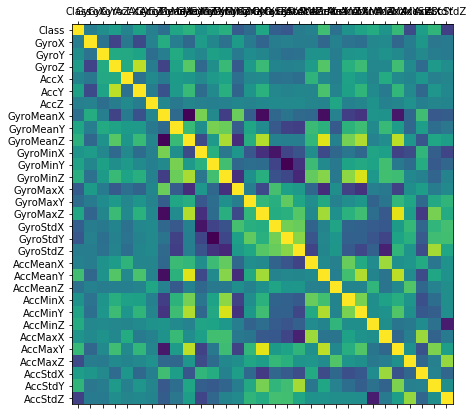

In [4]:
# Criar gráfico
plot_corr(dat)

In [5]:
# plt.figure(figsize=(15, 10))
# plt.grid(True)
# plt.plot(dat['AccY'], label='AccY')
# plt.plot(dat['AccMeanY'], label='AccMeanY')
# plt.legend(loc=2)

### <font color='black'>3 - Pré-Processamento</font>

In [6]:
'''
Verificar Dataset
'''
print("=== Valores nulos? ===")

# Verificar se existe valores nulos
print(dat.isnull().values.any())
print("")

=== Valores nulos? ===
False



In [7]:
#arquivo externo (pre-processamento)

### <font color='black'>4 - Separando (Treinamento/Teste)</font>

In [8]:
'''
Criando objetos
'''
# X (atributos) | Y (Classe)
X = dat.drop('Class', axis=1).values
Y = dat['Class'].values

print("=== X ===")
print(X)
print("")
print("=== Y ===")
print(Y)

=== X ===
[[-0.7480916   4.3740458   0.80916031 ...  0.13882754  0.07534385
   0.05442698]
 [-0.58778626  5.36641221  1.8778626  ...  0.13356125  0.07384141
   0.05847126]
 [-0.38931298  2.52671756  0.38167939 ...  0.13397978  0.07262998
   0.06641952]
 ...
 [-1.0610687   4.53435115  1.18320611 ...  0.23676448  0.18110744
   0.05263305]
 [-1.01526718  5.25954198  0.65648855 ...  0.23475034  0.17843037
   0.0528343 ]
 [-0.8778626   4.48854962  0.04580153 ...  0.22621489  0.17165357
   0.05250044]]

=== Y ===
[1 1 1 ... 4 4 4]


In [9]:
'''
Divisão de conjunto de treinamento e teste.

Treinamento - 70% | Teste - 30%
'''

print("-> Conjunto Treinamento e Teste: (70% e 30%)\n")

models = ["Decision Tree", "Random Forest", "SVM", "Naive Bayes", "KNN (k=10)"]
model_scores = []

#Dividindo dataset em treinamento e teste
split_test_size = 0.30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_test_size, random_state=0)

-> Conjunto Treinamento e Teste: (70% e 30%)



In [10]:
'''
Decision Tree
'''
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_dt.fit(X_train, Y_train.ravel())

# Verificando nos dados de teste
#Resultado - Random Forest
print("---------------------------")
print("- Decision Tree:          -")
print("---------------------------")
result = model_dt.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_dt.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- Decision Tree:          -
---------------------------
Accuracy: 97.87%


=== Confusion Matrix ===
[[ 57   0   0   0]
 [  1  87   1   0]
 [  0   3 102   1]
 [  0   0   1  76]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        57
          2       0.97      0.98      0.97        89
          3       0.98      0.96      0.97       106
          4       0.99      0.99      0.99        77

avg / total       0.98      0.98      0.98       329





In [11]:
'''
Random Forest
'''
from sklearn import metrics

#Criando modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state = 0)
model_rf.fit(X_train, Y_train.ravel())

# Verificando nos dados de teste
#Resultado - Random Forest
print("---------------------------")
print("- Random Forest:          -")
print("---------------------------")
result = model_rf.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_rf.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- Random Forest:          -
---------------------------
Accuracy: 98.78%


=== Confusion Matrix ===
[[ 57   0   0   0]
 [  1  88   0   0]
 [  0   2 104   0]
 [  0   0   1  76]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        57
          2       0.98      0.99      0.98        89
          3       0.99      0.98      0.99       106
          4       1.00      0.99      0.99        77

avg / total       0.99      0.99      0.99       329





In [12]:
'''
SVM
'''
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, Y_train)

# Verificando nos dados de teste
#Resultado - SVM
print("---------------------------")
print("- SVM:          -")
print("---------------------------")
result = model_svm.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_svm.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- SVM:          -
---------------------------
Accuracy: 96.96%


=== Confusion Matrix ===
[[55  0  2  0]
 [ 1 88  0  0]
 [ 2  2 99  3]
 [ 0  0  0 77]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.95      0.96      0.96        57
          2       0.98      0.99      0.98        89
          3       0.98      0.93      0.96       106
          4       0.96      1.00      0.98        77

avg / total       0.97      0.97      0.97       329





In [13]:
'''
Naive Bayes
'''
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train.ravel())

#Resultado - Naive Bayes
print("---------------------------")
print("- Naive Bayes:            -")
print("---------------------------")
result = model_nb.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_nb.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- Naive Bayes:            -
---------------------------
Accuracy: 93.62%


=== Confusion Matrix ===
[[55  0  2  0]
 [ 2 87  0  0]
 [12  2 91  1]
 [ 1  0  1 75]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.79      0.96      0.87        57
          2       0.98      0.98      0.98        89
          3       0.97      0.86      0.91       106
          4       0.99      0.97      0.98        77

avg / total       0.94      0.94      0.94       329





In [14]:
'''
KNN
'''
# Valores de K
K = range(1,11)
aux = 0
# Teste dos modelos
for ck in K:
    knn = KNeighborsClassifier(n_neighbors=ck)
    knn.fit(X_train,Y_train)
    
    if(knn.score(X_test,Y_test) > aux):
        aux = knn.score(X_test,Y_test)
        k = ck
    
    print(ck, knn.score(X_test,Y_test))

1 0.9513677811550152
2 0.9452887537993921
3 0.9483282674772037
4 0.9513677811550152
5 0.9483282674772037
6 0.9483282674772037
7 0.9483282674772037
8 0.9452887537993921
9 0.9422492401215805
10 0.939209726443769


In [15]:
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train,Y_train)


#Resultado - KNN
print("---------------------------")
print("- KNN:            -")
print("---------------------------")
result = model_knn.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))
print('\n')
model_scores.append(result*100.0)

rf_predict_test = model_knn.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rf_predict_test))
print('\n')

print("=== Classification Report ===")
print(classification_report(Y_test, rf_predict_test))
print('\n')

---------------------------
- KNN:            -
---------------------------
Accuracy: 95.14%


=== Confusion Matrix ===
[[55  1  1  0]
 [ 1 87  1  0]
 [ 2  2 98  4]
 [ 3  0  1 73]]


=== Classification Report ===
             precision    recall  f1-score   support

          1       0.90      0.96      0.93        57
          2       0.97      0.98      0.97        89
          3       0.97      0.92      0.95       106
          4       0.95      0.95      0.95        77

avg / total       0.95      0.95      0.95       329





97.87% (Decision Tree)
98.78% (Random Forest)
96.96% (SVM)
93.62% (Naive Bayes)
95.14% (KNN (k=10))


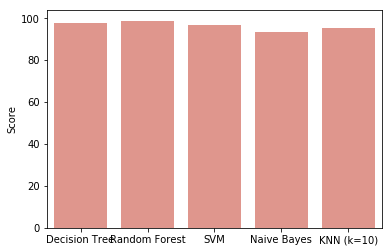

In [16]:
'''Comparação entre os Algoritmos
'''
for i in range(len(model_scores)):
    print("%.2f%% (%s)" % (model_scores[i], models[i]))
sns.barplot(x=[m for m in models], y=model_scores, color="salmon", saturation=.6);
plt.ylabel('Score')
plt.show()

### <font color='black'>4 - Separando (Validação Cruzada)</font>

In [17]:
# '''
# Criando objetos
# '''
# # X (atributos) | Y (Classe)
# X = dat.drop('Class', axis=1).values
# Y = dat['Class'].values

# print("=== X ===")
# print(X)
# print("")
# print("=== Y ===")
# print(Y)

In [18]:
# '''
# Validação Cruzada K-Fold

# K=10
# '''
# print("-> Validação Cruzada K-Fold\n")

# k=12

In [19]:
# '''
# Random Forest
# '''
# #Criando modelo Random Forest
# model_kfold = RandomForestClassifier(random_state = 42)

# #Cross-Validation
# #kfold = KFold(n_splits=10, random_state=0)
# results_kfold = cross_val_score(model_kfold, X, Y, cv=k)

# #Resultado - Random Forest
# print("---------------------------")
# print("- Random Forest:          -")
# print("---------------------------")
# print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# print("=== All AUC Scores ===")
# print(results_kfold)
# print('\n')

# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", results_kfold.mean())

### <font color='black'>5 - Salvando Modelo</font>

In [20]:
#Parâmetros de configuração
model = model_rf
filename = 'modelo.pkl'

In [21]:
#Salava o modelo
pickle.dump(model, open(filename, 'wb'))

### <font color='black'>6 - Fazendo Previsões com o Modelo Treinado 1</font>

In [22]:
# #Parâmetros de entrada
# dic = {"GYROX": -5.961832,  "GYROY": 8.358779,  "GYROZ": 8.893130,  "ACCX": 8.472900,  "ACCY": -8.431152,  "ACCZ": -8.873535,
#       "GYROMeanX": -11.961832,  "GYROMeanY": 21.358779,  "GYROMeanZ": 81.893130,  "ACCMeanX": 02.472900,  "ACCMeanY": -02.431152,  "ACCMeanZ": -02.873535,
#       "GYROMinX": -11.961832,  "GYROMinY": 21.358779,  "GYROMinZ": 81.893130,  "ACCMinX": 01.472900,  "ACCMinY": -01.1431152,  "ACCMinZ": -02.873535,
#       "GYROMaxX": -11.961832,  "GYROMaxY": 21.358779,  "GYROMaxZ": 81.893130,  "ACCMaxX": 01.472900,  "ACCMaxY": -01.431152,  "ACCMaxZ": -02.873535,
#       "GYROStdX": -11.961832,  "GYROStdY": 21.358779,  "GYROStdZ": 81.893130,  "ACCStdX": 01.472900,  "ACCStdY": -01.431152,  "ACCStdZ": -02.873535}

# filename = 'modelo.pkl'

In [23]:
# loaded_model = pickle.load(open(filename,'rb'))

# #Cria Array e 
# a = np.array([list(dic.values())])
# prediction = loaded_model.predict(a)[0]

In [24]:
# print(prediction)

### <font color='black'>6 - Fazendo Previsões com o Modelo Treinado 2</font>

In [25]:
filename = 'modelo.pkl'

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))

i = 5

result = loaded_model.predict(X_test[i].reshape(1, -1))
#result = loaded_model.predict(X_test)
print("Class (Previsão) = " + str(result))

print("\n\n")

print("Class Dataset:")
print(dat.loc[(dat['GyroX'] == X_test[i][0]) & (dat['GyroY'] == X_test[i][1]) & (dat['GyroZ'] == X_test[i][2])]['Class'])

Class (Previsão) = [1]



Class Dataset:
27    1
Name: Class, dtype: int64
